# Home credit defaul risk project

In [6]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline 

In [7]:
train = pd.read_csv("Input/application_train.csv")




In [8]:
print("training: ", train.shape)


training:  (307511, 122)


## Data Pre-processing

### Check percentage of missing data & dropping columns with over 60% missing values

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
def missing_over60(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>60]
    print('number of columns has over 60% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [11]:
drop_list = list(missing_over60(train))
len(drop_list)

number of columns has over 60% missing values:  17


17

In [12]:
# test set
test  = pd.read_csv('Input/application_test.csv')

In [13]:
def drop_columns(file):
    print('number of columns before dropping: ', file.shape[1])
    for col in list(missing_over60(file)):
        if col in list(file.columns):
            file = file.drop([col], axis=1)
    print('number of columns left after droping:', file.shape[1])
    return file
        

In [14]:
train_d= drop_columns(train)
drop_columns(train).columns

number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105
number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [15]:
drop_columns(train).columns.tolist()

number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS

In [16]:
for item in drop_list:
    if item in list(test.columns):
        test = test.drop([item], axis=1)
test.shape
#train_d.shape

(48744, 104)

### Drop dates_employed over 32400 (90 years)


In [17]:
train_d= train_d[train_d['DAYS_EMPLOYED']<32400]

In [18]:
test= test[test['DAYS_EMPLOYED']<32400]

## Embedding Neural Networks


In [19]:
# col_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
#             'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
#             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
#             'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
#             'EMERGENCYSTATE_MODE']
# #print(col_list)
# def to_cat_col(col):
    
#     train_d[col] = train_d[col].cat.codes
#     return train_data[col]

In [20]:
# for col in col_list:
#     train_d[col] = train_d[col].astype('category').cat.codes
#     #train_d = to_cat_col(col)
#     #print(train_d[col])
# train_d.dtypes

In [21]:
int_col0 = train_d.select_dtypes(include=['int8']).columns.values.tolist()
int_col0

[]

In [22]:
int_col = train_d.select_dtypes(include=['int']).columns.values.tolist()
# int_col.remove('SK_ID_CURR')
# int_col.remove('TARGET')
# int_col.remove('CNT_CHILDREN')
# int_col.remove('DAYS_BIRTH')
# int_col.remove('DAYS_EMPLOYED')
# int_col.remove('DAYS_ID_PUBLISH')
int_col_all = int_col+int_col0


In [23]:
int_col_all

[]

In [24]:
train_d.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
train_d[int_col_all].max()

Series([], dtype: float64)

In [26]:
train_d.to_csv('train_d.csv', index = False)

In [27]:
#extract training data
import pickle
import csv


def csv2dicts(csvfile):
    data = []
    keys = []
    for row_index, row in enumerate(csvfile):
        if row_index == 0:
            keys = row
            print(row)
            continue
        # if row_index % 10000 == 0:
        #     print(row_index)
        data.append({key: value for key, value in zip(keys, row)})
    return data


def set_nan_as_string(data, replace_str='0'):
    for i, x in enumerate(data):
        for key, value in x.items():
            if value == '':
                x[key] = replace_str
        data[i] = x


train_data = "train_d.csv"

with open(train_data) as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    with open('train_data.pickle', 'wb') as f:
        data = csv2dicts(data)
        data = data[::-1]
        pickle.dump(data, f, -1)
        print(data[:3])





['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LAND

In [28]:
# extract 50 categorical features

"""['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']"""
import pickle
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import random
random.seed(42)

with open('train_data.pickle', 'rb') as f:
    train_data = pickle.load(f)
    num_records = len(train_data)



    
    
def feature_list():
  
    
    mobile = int(record['FLAG_MOBIL'])
    emp_phone = int(record['FLAG_EMP_PHONE'])
    work_phone = int(record['FLAG_WORK_PHONE'])
    cont_mo = int(record['FLAG_CONT_MOBILE'])
    phone= int(record['FLAG_PHONE'])
    email = int(record['FLAG_EMAIL'])
    region_rating = int(record['REGION_RATING_CLIENT'])
    region_city = int(record['REGION_RATING_CLIENT_W_CITY'])
    hour = int(record['HOUR_APPR_PROCESS_START'])
    region_live = int(record['REG_REGION_NOT_LIVE_REGION'])
    region_work = int(record['REG_REGION_NOT_WORK_REGION'])
    region_lw = int(record['LIVE_REGION_NOT_WORK_REGION'])
    Region_nl = int(record['REG_CITY_NOT_LIVE_CITY'])
    region_nw = int(record['REG_CITY_NOT_WORK_CITY'])
    city_lw = int(record['LIVE_CITY_NOT_WORK_CITY'])
    doc2 = int(record['FLAG_DOCUMENT_2'])
    doc3 = int(record['FLAG_DOCUMENT_3'])
    doc4 = int(record['FLAG_DOCUMENT_4'])
    doc5 = int(record['FLAG_DOCUMENT_5'])
    doc6 = int(record['FLAG_DOCUMENT_6'])
    doc7 = int(record['FLAG_DOCUMENT_7'])
    doc8 = int(record['FLAG_DOCUMENT_8'])
    doc9 = int(record['FLAG_DOCUMENT_9'])
    doc10 = int(record['FLAG_DOCUMENT_10'])
    doc11 = int(record['FLAG_DOCUMENT_11'])
    doc12 = int(record['FLAG_DOCUMENT_12'])
    doc13 = int(record['FLAG_DOCUMENT_13'])
    doc14 = int(record['FLAG_DOCUMENT_14'])
    doc15 = int(record['FLAG_DOCUMENT_15'])
    doc16 = int(record['FLAG_DOCUMENT_16'])
    doc17 = int(record['FLAG_DOCUMENT_17'])
    doc18 = int(record['FLAG_DOCUMENT_18'])
    doc19 = int(record['FLAG_DOCUMENT_19'])
    doc20 = int(record['FLAG_DOCUMENT_20'])
    doc21 = int(record['FLAG_DOCUMENT_21'])
    contract = int(record['NAME_CONTRACT_TYPE'])
    gender = int(record['CODE_GENDER'])
    car = int(record['FLAG_OWN_CAR'])
    realty = int(record['FLAG_OWN_REALTY'])
    suite = int(record['NAME_TYPE_SUITE'])
    income_type = int(record['NAME_INCOME_TYPE'])
    education = int(record['NAME_EDUCATION_TYPE'])
    family = int(record['NAME_FAMILY_STATUS'])
    housing = int(record['NAME_HOUSING_TYPE'])
    occupation = int(record['OCCUPATION_TYPE'])
    weekday = int(record['WEEKDAY_APPR_PROCESS_START'])
    org = int(record['ORGANIZATION_TYPE'])
    housetype = int(record['HOUSETYPE_MODE'])
    wall = int(record['WALLSMATERIAL_MODE'])
    eme = int(record['EMERGENCYSTATE_MODE'])

    return [
    mobile ,
    emp_phone,
    work_phone,
    cont_mo ,
    phone,
    email,
    region_rating,
    region_city,
    hour,
    region_live,
    region_work ,
    region_lw ,
    Region_nl ,
    region_nw ,
    city_lw ,
    doc2 ,
    doc3 ,
    doc4 ,
    doc5 ,
    doc6 ,
    doc7 ,
    doc8 ,
    doc9 ,
    doc10 ,
    doc11 ,
    doc12 ,
    doc13 ,
    doc14 ,
    doc15 ,
    doc16 ,
    doc17 ,
    doc18 ,
    doc19 ,
    doc20 ,
    doc21 ,
    contract ,
    gender ,
    car ,
    realty ,
    suite ,
    income_type,
    education ,
    family ,
    housing ,
    occupation ,
    weekday ,
    org ,
    housetype ,
    wall ,
    eme 
            ]


train_data_X = []
train_data_y = []

for record in train_data:
    
    fl = feature_list()
    train_data_X.append(fl)
    train_data_y.append(int(record['TARGET']))
    print('f1:', len(fl))
print("Number of train datapoints: ", len(train_data_y))

print(min(train_data_y), max(train_data_y))
#print(len(train_data_X[1]))




ValueError: invalid literal for int() with base 10: 'Cash loans'

In [ ]:
full_X = train_data_X
full_X = np.array(full_X)
train_data_X = np.array(train_data_X)
les = []
for i in range(train_data_X.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(full_X[:, i])
    les.append(le)
    train_data_X[:, i] = le.transform(train_data_X[:, i])

with open('les.pickle', 'wb') as f:
    pickle.dump(les, f, -1)

train_data_X = train_data_X.astype(int)
train_data_y = np.array(train_data_y)

with open('feature_train_data.pickle', 'wb') as f:
    pickle.dump((train_data_X, train_data_y), f, -1)
    print(train_data_X[0], train_data_y[0])

In [ ]:
train_data_y[train_data_y==0]=-1
train_data_y

In [ ]:
train_data_X.shape

In [ ]:
train_data_y.shape

In [ ]:
!pip install tensorflow

In [ ]:
def split_features(X):
    X_list = []

    store_index = X[..., [1]]
    X_list.append(store_index)

    day_of_week = X[..., [2]]
    X_list.append(day_of_week)

    promo = X[..., [3]]
    X_list.append(promo)

    year = X[..., [4]]
    X_list.append(year)

    month = X[..., [5]]
    X_list.append(month)

    day = X[..., [6]]
    X_list.append(day)

    State = X[..., [7]]
    X_list.append(State)

    return X_list

    mobile =X[..., [1]]
    X_list.append(mobile)
    emp_phone=X[..., [2]]
    X_list.append(emp_phone)
    work_phone=X[..., [3]]
    X_list.append(work_phone)
    cont_mo =X[..., [4]]
    X_list.append(cont_mo)
    phone =X[..., [5]]
    X_list.append(phone)
    email =X[..., [6]]
    X_list.append(email)
    region_rating =X[..., [7]]
    X_list.append(region_rating)
    region_city =X[..., [8]]
    X_list.append(region_city) 
    hour =X[..., [9]]
    X_list.append(hour)
    region_live =X[..., [10]]
    X_list.append(region_live)
    region_work =X[..., [11]]
    X_list.append(region_work)
    region_lw =X[..., [12]]
    X_list.append(region_lw)
    Region_nl =X[..., [13]]
    X_list.append(region_ln)
    region_nw =X[..., [14]]
    X_list.append(region_nw) 
    city_lw =X[..., [15]]
    X_list.append(city_lw)
    doc2 =X[..., [16]]
    X_list.append(doc2)
    doc3 =X[..., [17]]
    X_list.append(doc3)
    doc4 =X[..., [18]]
    X_list.append(doc4)
    doc5 =X[..., [19]]
    X_list.append(doc5)
    doc6 =X[..., [20]]
    X_list.append(doc6)
    doc7  =X[..., [21]]
    X_list.append(doc7)
    doc8 =X[..., [22]]
    X_list.append(doc8)
    doc9 =X[..., [23]]
    X_list.append(doc9)
    doc10 =X[..., [24]]
    X_list.append(doc10)
    doc11 =X[..., [25]]
    X_list.append(doc11)
    doc12 =X[..., [26]]
    X_list.append(doc12)
    doc13 =X[..., [27]]
    X_list.append(doc13) 
    doc14 =X[..., [28]]
    X_list.append(doc14)
    doc15 =X[..., [29]]
    X_list.append(doc14)
    doc16 =X[..., [30]]
    X_list.append(doc16)
    doc17 =X[..., [31]]
    X_list.append(doc17)
    doc18 =X[..., [32]]
    X_list.append(doc18)
    doc19 =X[..., [33]]
    X_list.append(doc19)
    doc20 =X[..., [34]]
    X_list.append(doc20)
    doc21 =X[..., [35]]
    X_list.append(doc21)
    contract =X[..., [36]]
    X_list.append(contract)
    gender =X[..., [37]]
    X_list.append(gender)
    car =X[..., [38]]
    X_list.append(car)
    realty =X[..., [39]]
    X_list.append(realty)
    suite =X[..., [40]]
    X_list.append(suite)
    income_type =X[..., [41]]
    X_list.append(income_type)
    education =X[..., [42]]
    X_list.append(education)
    family =X[..., [43]]
    X_list.append(family)
    housing =X[..., [44]]
    X_list.append(housing)
    occupation =X[..., [45]]
    X_list.append(occupation)
    weekday =X[..., [46]]
    X_list.append(weekday)
    org =X[..., [47]]
    X_list.append(org)
    housetype =X[..., [48]]
    X_list.append(housetype)
    wall =X[..., [49]]
    X_list.append(wall)
    eme =X[..., [50]]
    X_list.append(eme)
    return X_list

In [29]:
import pickle
import numpy
import math

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate

#from prepare_nn_features import split_features


class Model(object):

    def __init__(self, train_ratio):
        self.train_ratio = train_ratio
        self.__load_data()

    def evaluate(self):
        if self.train_ratio == 1:
            return 0
        total_sqe = 0
        num_real_test = 0
        for record, target in zip(self.X_val, self.y_val):
    
            sqe = ((target - self.y_val) / target) ** 2
            total_sqe += sqe
            num_real_test += 1
        result = math.sqrt(total_sqe / num_real_test)
        return result

    def __load_data(self):
        f = open('feature_train_data.pickle', 'rb')
        (self.X, self.y) = pickle.load(f)
        self.X = numpy.array(self.X)
        self.y = numpy.array(self.y)
        self.num_records = len(self.X)
        self.train_size = int(self.train_ratio * self.num_records)
        self.test_size = self.num_records - self.train_size
        self.X, self.X_val = self.X[:self.train_size], self.X[self.train_size:]
        self.y, self.y_val = self.y[:self.train_size], self.y[self.train_size:]


class NN_with_EntityEmbedding(Model):

    def __init__(self, train_ratio):
        super().__init__(train_ratio)
        self.preprocessing(self.X)
        self.nb_epoch = 20
        self.checkpointer = ModelCheckpoint(filepath="best_model_weights.hdf5", verbose=1, save_best_only=True)
        self.max_log_y = numpy.max(numpy.log(self.y))
        self.min_log_y = numpy.min(numpy.log(self.y))
        self.__build_keras_model()
        self.fit()

    def preprocessing(self, X):
        X_list = split_features(X)
        return X_list

    def __build_keras_model(self):
        models = []
        
        #1
        model_mobile = Sequential()
        model_mobile.add(Dense(2, input_dim=2))
        models.append(model_mobile)
        #2
        model_emp_phone = Sequential()
        model_emp_phone.add(Dense(2, input_dim=2))
        models.append(model_emp_phone)
        #3
        model_work_phone = Sequential()
        model_work_phone.add(Dense(2, input_dim=2))
        models.append(model_work_phone)
        #4
        model_cont_mo = Sequential()
        model_cont_mo.add(Dense(2, input_dim=2))
        models.append(model_cont_mo)
        #5
        
        
        model_phone = Sequential()
        model_phone.add(Dense(2, input_dim=2))
        models.append(model_phone)
        #6
        model_email = Sequential()
        model_email.add(Dense(2, input_dim=2))
        models.append(model_email)
        #7
        model_region_rating = Sequential()
        model_region_rating.add(Embedding(4, 2, input_length=1))
        model_region_rating.add(Reshape((2,)))
        models.append(model_region_rating)
        #8
        model_region_city = Sequential()
        model_region_city.add(Embedding(4, 2, input_length=1))
        model_region_city.add(Reshape((2,)))
        models.append(model_region_city)
        #9
        model_hour = Sequential()
        model_hour.add(Embedding(24, 2, input_length=1))
        model_hour.add(Reshape((2,)))
        models.append(model_hour)        
        #10
        model_region_live = Sequential()
        model_region_live.add(Dense(2, input_dim=2))
        models.append(model_region_live)
        #11
        model_region_work = Sequential()
        model_region_work.add(Dense(2, input_dim=2))
        models.append(model_region_work)
        #12
        model_region_lw = Sequential()
        model_region_lw.add(Dense(2, input_dim=2))
        models.append(model_region_lw)
        #13
        model_Region_nl = Sequential()
        model_Region_nl.add(Dense(2, input_dim=2))
        models.append(model_Region_nl)
        #14
        model_region_nw = Sequential()
        model_region_nw.add(Dense(2, input_dim=2))
        models.append(model_region_nw)        
        #15
        model_city_lw = Sequential()
        model_city_lw.add(Dense(2, input_dim=2))
        models.append(model_city_lw)
        #16
        model_doc2 = Sequential()
        model_doc2.add(Dense(2, input_dim=2))
        models.append(model_doc2)
        #17
        model_doc3 = Sequential()
        model_doc3.add(Dense(2, input_dim=2))
        models.append(model_doc3) 
        #18
        model_doc4 = Sequential()
        model_doc4.add(Dense(2, input_dim=2))
        models.append(model_doc4)       
        #19
        model_doc5 = Sequential()
        model_doc5.add(Dense(2, input_dim=2))
        models.append(model_doc5)
        #20
        model_doc6 = Sequential()
        model_doc6.add(Dense(2, input_dim=2))
        models.append(model_doc6)
        #21
        model_doc7 = Sequential()
        model_doc7.add(Dense(2, input_dim=2))
        models.append(model_doc7)
        #22
        model_doc8 = Sequential()
        model_doc8.add(Dense(2, input_dim=2))
        models.append(model_doc8)
        #23
        model_doc9 = Sequential()
        model_doc9.add(Dense(2, input_dim=2))
        models.append(model_doc9)
        #24
        model_doc10 = Sequential()
        model_doc10.add(Dense(2, input_dim=2))
        models.append(model_doc10)
        #25
        model_doc11 = Sequential()
        model_doc11.add(Dense(2, input_dim=2))
        models.append(model_doc11)
        #26
        model_doc12 = Sequential()
        model_doc12.add(Dense(2, input_dim=2))
        models.append(model_doc12)
        #27
        model_doc13 = Sequential()
        model_doc13.add(Dense(2, input_dim=2))
        models.append(model_doc13)
        #28
        model_doc14 = Sequential()
        model_doc14.add(Dense(2, input_dim=2))
        models.append(model_doc14)
        #29
        model_doc15 = Sequential()
        model_doc15.add(Dense(2, input_dim=2))
        models.append(model_doc15)
        #30
        model_doc16 = Sequential()
        model_doc16.add(Dense(2, input_dim=2))
        models.append(model_doc16)
        #31
        model_doc17 = Sequential()
        model_doc17.add(Dense(2, input_dim=2))
        models.append(model_doc17)
        #32
        model_doc18 = Sequential()
        model_doc18.add(Dense(2, input_dim=2))
        models.append(model_doc18)
        #33
        model_doc19 = Sequential()
        model_doc19.add(Dense(2, input_dim=2))
        models.append(model_doc19)
        #34
        model_doc20 = Sequential()
        model_doc20.add(Dense(2, input_dim=2))
        models.append(model_doc20)
        #35
        model_doc21 = Sequential()
        model_doc21.add(Dense(2, input_dim=2))
        models.append(model_doc21)
        #36
        model_contract = Sequential()
        model_contract.add(Dense(2, input_dim=2))
        models.append(model_contract)
        #37
        model_gender = Sequential()
        model_gender.add(Embedding(4, 2, input_length=1))
        model_gender.add(Reshape((2,)))
        models.append(model_gender)
        #38
        model_car = Sequential()
        model_car.add(Dense(2, input_dim=2))
        models.append(model_car)
        #39
        model_realty = Sequential()
        model_realty.add(Dense(2, input_dim=2))
        models.append(model_realty)
        #40
        model_suite = Sequential()
        model_suite.add(Embedding(8, 3, input_length=1))
        model_suite.add(Reshape((3,)))
        models.append(model_suite)
        #41
        model_income_type = Sequential()
        model_income_type.add(Embedding(7, 3, input_length=1))
        model_income_type.add(Reshape((3,)))
        models.append(model_income_type)
        #42
        model_education = Sequential()
        model_education.add(Embedding(5, 2, input_length=1))
        model_education.add(Reshape((2,)))
        models.append(model_education)
        #43
        model_family = Sequential()
        model_family.add(Embedding(6, 3, input_length=1))
        model_family.add(Reshape((3,)))
        models.append(model_family)
        #44
        model_housing = Sequential()
        model_housing.add(Embedding(6, 3, input_length=1))
        model_housing.add(Reshape((3,)))
        models.append(model_housing)
        #45
        model_occupation = Sequential()
        model_occupation.add(Embedding(19, 6, input_length=1))
        model_occupation.add(Reshape((6,)))
        models.append(model_occupation)
        #46
        model_weekday = Sequential()
        model_weekday.add(Embedding(7, 3, input_length=1))
        model_weekday.add(Reshape((3,)))
        models.append(model_weekday)
        #47
        model_org = Sequential()
        model_org.add(Embedding(57, 3, input_length=1))
        model_org.add(Reshape((3,)))
        models.append(model_org)
        #48
        model_housetype = Sequential()
        model_housetype.add(Embedding(4, 2, input_length=1))
        model_housetype.add(Reshape((2,)))
        models.append(model_housetype)
        #49
        model_wall = Sequential()
        model_wall.add(Embedding(7, 3, input_length=1))
        model_wall.add(Reshape((3,)))
        models.append(model_wall)
        #50
        model_eme = Sequential()
        model_eme.add(Embedding(3, 1, input_length=1))
        model_eme.add(Reshape((1,)))
        models.append(model_eme)
        
        
        #model_concat = concatenate([modela, modelb])
        self.model = Sequential()
        merged = concatenate(models)
        self.model.add(merged)
        self.model.add(Dropout(0.02))
        self.model.add(Dense(1000, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(500, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(1))
        self.model.add(Activation('sigmoid'))

        self.model.compile(loss='mean_absolute_error', optimizer='adam')

    def _val_for_fit(self, val):
        val = numpy.log(val) / self.max_log_y
        return val

    def _val_for_pred(self, val):
        return numpy.exp(val * self.max_log_y)

    def fit(self):
        if self.train_ratio < 1:
            self.model.fit(self.preprocessing(self.X), self._val_for_fit(self.y),
                           validation_data=(self.preprocessing(self.X_val), self._val_for_fit(self.y_val)),
                           nb_epoch=self.nb_epoch, batch_size=128,
                           # callbacks=[self.checkpointer],
                           )
            # self.model.load_weights('best_model_weights.hdf5')
            print("Result on validation data: ", self.evaluate())
        else:
            self.model.fit(self.preprocessing(self.X), self._val_for_fit(self.y),
                           nb_epoch=self.nb_epoch, batch_size=128)

    def guess(self, feature):
        feature = numpy.array(feature).reshape(1, -1)
        return self._val_for_pred(self.model.predict(self.preprocessing(feature)))[0][0]


C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
import pickle
#from models import NN_with_EntityEmbedding
import math
import numpy
import sys
sys.setrecursionlimit(10000)

num_networks = 1
train_ratio = 0.97

with open('feature_train_data.pickle', 'rb') as f:
    X, y = pickle.load(f)
    num_records = len(y)

models = []
for i in range(num_networks):
    print("Fitting NN_with_EntityEmbedding...")
    models.append(NN_with_EntityEmbedding(train_ratio))

with open('models.pickle', 'wb') as f:
    pickle.dump(models, f, -1)


def evaluate_models(models, num_records):
    model0 = models[0]
    total_sqe = 0
    num_real_test = 0
    if model0.train_ratio == 1:
        return 0
    for i in range(model0.train_size, num_records):
        record = X[i]
        target = y[i]
        
        guessed_target = numpy.mean([model.guess(record) for model in models])
        sqe = ((target - guessed_target) / sales) ** 2
        total_sqe += sqe
        num_real_test += 1
        if num_real_test % 1000 == 0:
            print("{}/{}".format(num_real_test, num_records - model0.train_size))
            print(target, guessed_target)
    result = math.sqrt(total_sqe / num_real_test)
    return result

print("Evaluate combined models...")
r = evaluate_models(models, num_records)
print(r)





Fitting NN_with_EntityEmbedding...


NameError: name 'split_features' is not defined

In [31]:
import keras
import tensorflow
print(keras.__version__)

2.2.4


In [34]:
with open('feature_test_data.pickle', 'rb') as f:
    test_X = pickle.load(f)

with open('predictions.csv', 'w') as f:
    f.write('Id,Sales\n')
    for i, record in enumerate(test_X):
        store_open = record[0]
        guessed_sales = numpy.mean([model.guess(record) for model in models]) if store_open else 0
        f.write('{},{}\n'.format(i+1, guessed_sales))

FileNotFoundError: [Errno 2] No such file or directory: 'feature_test_data.pickle'

### Check categorical data that are not quantitative 

In [35]:
def check_cat(data):
    col = data.columns 
    num_col = data._get_numeric_data().columns
    return list(set(col)-set(num_col))


In [36]:
def check_quan_qual(file):
    quan = list( file.loc[:,file.dtypes != 'object'].columns.values )
    qual = list( file.loc[:,file.dtypes == 'object'].columns.values )
   
    print('number of quantitative columns:',len(quan))
    print('number of qualitative columns:',len(qual))
    print('qualitative columns',qual)
        

In [37]:
check_quan_qual(train_d)

number of quantitative columns: 90
number of qualitative columns: 15
qualitative columns ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [38]:
cat_list_trn = list( train_d.loc[:,train_d.dtypes == 'object'].columns.values )
cat_list_trn

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Target encoding with smoothing
min_samples_leaf define a threshold where prior and target mean (for a given category value) have the same weight. Below the threshold prior becomes more important and above mean becomes more important.

How weight behaves against value counts is controlled by smoothing parameter

In [39]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
#https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

In [40]:
cat_list_trn = list( train_d.loc[:,train_d.dtypes == 'object'].columns.values )
cat_list_trn
for item in cat_list_trn: 
    train_d[item], test[item] = target_encode(train_d[item], 
                             test[item], 
                             target=train_d.TARGET, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [41]:
train_d.loc[:,train_d.dtypes == 'object'].columns.values

array([], dtype=object)

In [42]:
test.loc[:,test.dtypes == 'object'].columns.values

array([], dtype=object)

In [43]:
train_d['NAME_CONTRACT_TYPE']


0         0.091051
1         0.091294
2         0.056236
3         0.089439
4         0.089843
5         0.089680
6         0.089793
7         0.091948
9         0.055825
10        0.088181
12        0.090724
13        0.089598
14        0.089512
15        0.091204
16        0.090035
17        0.055426
18        0.056502
19        0.090467
20        0.057107
21        0.088614
22        0.090049
24        0.089895
25        0.090888
26        0.089942
27        0.087721
28        0.089806
29        0.056468
30        0.091617
31        0.089225
32        0.091055
            ...   
307477    0.092022
307478    0.092665
307479    0.090951
307480    0.089806
307481    0.089245
307482    0.090126
307484    0.090372
307485    0.057032
307486    0.089115
307488    0.090065
307489    0.088746
307490    0.090868
307491    0.091050
307492    0.092076
307493    0.090770
307494    0.089991
307495    0.089864
307496    0.055907
307497    0.090740
307498    0.090269
307499    0.090199
307500    0.

In [44]:
train_tar = train_d[['SK_ID_CURR','TARGET']]

In [45]:
train_tar.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [46]:
## join target encoding dataframes and join data frames on primary keys
# dfs = [pre_app_d, pos_d, bu_d, ccba_d, pmt_d]
def target_encode_dataframes(train_tar, df,key):

    #dfs_new=[]
    #for df in dfs:
    new_df = pd.merge( df, train_tar,on=key)
    #print(train_tar)
    row = new_df.shape[0]
    train_new_df = new_df.iloc[:round(row*.6), 0:]
    #print(train_new_df.columns)
    test_new_df = new_df.iloc[round(row*.6)+1:, :-2]
    #print(test_new_df.columns)
    cat_list_pre = list( train_new_df.loc[:,train_new_df.dtypes == 'object'].columns.values )
    cat_list_pre
    for item in cat_list_pre: 
        train_new_df[item], test_new_df[item] = target_encode(train_new_df[item], 
                                 test_new_df[item], 
                                 target=train_new_df.TARGET, 
                                 min_samples_leaf=100,
                                 smoothing=10,
                                 noise_level=0.01)
    # add SK_ID_CURR back
    #print(train_new_df.columns)
    #train_j= pd.concat([train_new_df,train_new_df.iloc[:round(row*.6),0]], axis=1) 
    #print(train_j.columns)
    # group by ID
    train_g = train_new_df.groupby([key]).mean()
    return train_g


    

In [47]:
#check column numbers of final result
train_d.shape

(252137, 105)

### Log transformation

Apply log transformation to highly skewed columns


In [48]:
train_d.columns[1:-1]

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object', length=103)

In [49]:
for c in train_d.columns[1:-1]:
    if train_d[c].mean()>100:
        print(c)
        train_d[c] = train_d[c].apply(lambda x: np.log(x+1))

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE


### Fill missing values

In [50]:
train_d = train_d.fillna(train_d.mean())
test_f = test.fillna(test.mean())

In [51]:
train_d.isnull().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
                             ..
DEF_30_C

### Standardization

In [52]:
# filter out columns that only has 0 as values
sd = train_d.iloc[:, 1:-2]
sd.columns[(sd == 0).all()]

Index([], dtype='object')

In [53]:
drop_c = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_21']

sd = sd.drop(drop_c, 1)

In [54]:
sd.shape

(252137, 95)

In [55]:
sd.columns[(sd == np.inf).all()]

Index([], dtype='object')

In [56]:
sd.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            307499, 307500, 307501, 307502, 307503, 307504, 307506, 307508,
            307509, 307510],
           dtype='int64', length=252137)

In [57]:
index = []
NaN_counter = []
inf_counter = []

for col in sd.columns:
    index.append(col)
    inf_counter.append(np.any(np.isfinite(train_d[col])))
    NaN_counter.append(np.any(np.isnan(train_d[col])))

data_check = {'Any_NaN': NaN_counter, 'Any_inf': inf_counter}
data_verification = pd.DataFrame(data=data_check, index=index)
print(data_verification)

                             Any_NaN  Any_inf
TARGET                         False     True
NAME_CONTRACT_TYPE             False     True
CODE_GENDER                    False     True
FLAG_OWN_CAR                   False     True
FLAG_OWN_REALTY                False     True
CNT_CHILDREN                   False     True
AMT_INCOME_TOTAL               False     True
AMT_CREDIT                     False     True
AMT_ANNUITY                    False     True
AMT_GOODS_PRICE                False     True
NAME_TYPE_SUITE                False     True
NAME_INCOME_TYPE               False     True
NAME_EDUCATION_TYPE            False     True
NAME_FAMILY_STATUS             False     True
NAME_HOUSING_TYPE              False     True
REGION_POPULATION_RELATIVE     False     True
DAYS_BIRTH                     False     True
DAYS_EMPLOYED                  False     True
DAYS_REGISTRATION              False     True
DAYS_ID_PUBLISH                False     True
FLAG_MOBIL                     Fal

In [58]:
sd = sd.replace([np.inf, -np.inf], np.nan)

In [59]:
sd = sd.fillna(sd.mean())

In [60]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(sd)

C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [61]:
standardized_X= pd.DataFrame(standardized_X, columns = sd.columns)

In [62]:
standardized_X.shape

(252137, 95)

In [63]:
y = train_d.iloc[:, -1]

In [64]:
y=y.values.reshape(-1,1)

In [65]:
y.shape

(252137, 1)

## Feature Engineer

After the above steps, there are 2919 rows and 159 attributes left in the dataset. Below is to employ our approach for feature selection. 

Our approach is to use a inverted pyramid structure to filter out desired feature sets. All of the features was first filtered out by VIF (Variance Inflation Factor) score. VIF is a metric that evaluates collinearity. The higher the score is, the the severe the collinearity for a feature it indicates. We set a threshold of 10. Any features that have a score less than 10 were preserved to dataframe X_reduced.

The inverted pyramid structure contains two levels. The first level include two filters, RFE+ random forest and RFE + logistic regression. The second level includes RFE + SVR. RFE is a recursive feature elimination wrapper class that selects features by their importance. The two filter on the first level is to categorize features into two categories: selected and unselected. Due to different mechanisms of random forest and logistic regression, the features selected by each filter varies to a extend. We then package the common sets and feed the them into the second level filter, which is consist of RFE+SVR with a linear kernel. A final set of feature then generated.   

### RFE and random forest regressor using VIF filter

1. calculate VIF (Variance Inflation Factor) for each column of X
2. set the threshold of VIF to 10 
3. remove columns that has a VIF value higher than the threshold
4. feed the reduced X to RFE with RF and select 53 features

In [70]:
#import sys
#!{sys.executable} -m pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = standardized_X
y = y

In [71]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [72]:
vif

,VIF Factor,features
0,1.072038,TARGET
1,5.003173,NAME_CONTRACT_TYPE
2,1.420521,CODE_GENDER
3,1.217869,FLAG_OWN_CAR
4,1.050360,FLAG_OWN_REALTY
5,5.769470,CNT_CHILDREN
6,1.645712,AMT_INCOME_TOTAL
7,50.514796,AMT_CREDIT
8,4.277303,AMT_ANNUITY
9,50.986187,AMT_GOODS_PRICE


In [73]:
threshold = 10
collinearity_col = vif["features"].loc[vif["VIF Factor"]>threshold].tolist()

In [74]:
collinearity_col

['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [77]:
X_reduced=X.drop(collinearity_col, axis=1)
X_reduced.shape

(252137, 62)

In [78]:

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier


# rf_model = RandomForestClassifier()

# # create the RFE model and select 100 attributes
# rfe = RFE(rf_model, 53, step=10)
# rfe_fit = rfe.fit(X_reduced, y)

# # summarize the selection of the attributes
# print("Num Features: ", rfe_fit.n_features_)
# print("Selected Features:", rfe_fit.support_)
# print("Feature Ranking: ", rfe_fit.ranking_)

# # evaluate the model on testing set
# pred_y = rfe_model.predict(test_x)
# predictions = [round(value) for value in pred_y]


C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Unknown label type: 'continuous'

In [79]:
# selected_featureset_rf = X_reduced.columns[rfe_fit.support_]

NameError: name 'rfe_fit' is not defined

In [80]:
# selected_featureset_rf

NameError: name 'selected_featureset_rf' is not defined

In [ ]:
# unselected_featureset_rf = X_reduced.columns[~rfe_fit.support_]

In [ ]:
# unselected_featureset_rf

### RFE and logistic regression

This is a parallel feature selection. The main goal of this process is to use logistic regression to select 54 features from the dataset according to the importance of the features (features that offer maximum likelihood). 

In [162]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # feature extraction
# model_lr = LogisticRegression()
# rfe_lr = RFE(model_lr, 54, step=10)
# fit_lr = rfe_lr.fit(X_reduced, y)
# print("Num Features: ", fit_lr.n_features_)
# print("Selected Features:", fit_lr.support_)
# print("Feature Ranking: ", fit_lr.ranking_)

C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [163]:
# selected_featureset_lr = X_reduced.columns[fit_lr.support_]

NameError: name 'fit_lr' is not defined

In [164]:
# selected_featureset_lr

NameError: name 'selected_featureset_lr' is not defined

In [165]:
# unselected_featureset_lr = X_reduced.columns[~fit_lr.support_]

NameError: name 'fit_lr' is not defined

In [166]:
# unselected_featureset_lr

NameError: name 'unselected_featureset_lr' is not defined

In [167]:
# # commom feature sets
# common_selected = [i for i in selected_featureset_lr if i in selected_featureset_rf]
# print('common features selected by both: ', len(common_selected))
# common_selected

NameError: name 'selected_featureset_lr' is not defined

In [168]:
# common_unselected = [i for i in unselected_featureset_lr if i in unselected_featureset_rf]
# print('common features unselected by both: ', len(common_unselected))
# common_unselected

NameError: name 'unselected_featureset_lr' is not defined

### RFE and SVR selection

Above process select favorable features and least favorable features according to the ensemble methods. Below process is to feed the common favorable feature as well as common least favorable features to the third ensemble to finalize a 40 feature set as the input for the baseline model. 

In [81]:
# common_features = common_unselected+ common_selected

NameError: name 'common_unselected' is not defined

In [82]:
# X_commonf = X_reduced[common_unselected+common_selected]

NameError: name 'common_unselected' is not defined

In [83]:
# from sklearn.svm import SVR

# # feature extraction
# model_svr = SVR(kernel="linear")
# rfe_svr = RFE(model_svr, 40, step=5)
# fit_svr = rfe_svr.fit(X_commonf, y)
# print("Num Features: ", fit_svr.n_features_)
# print("Selected Features:", fit_svr.support_)
# print("Feature Ranking: ", fit_svr.ranking_)

NameError: name 'X_commonf' is not defined

In [84]:
# final_featureset = X_commonf.columns[fit_svr.support_]
# final_featureset

NameError: name 'X_commonf' is not defined

In [85]:
# common_last_pick = [i for i in final_featureset if i in common_selected]
# print('common features selected by both svr and rf: ', len(common_last_pick))
# common_last_pick


NameError: name 'final_featureset' is not defined

In [86]:
# X_final = X_commonf[final_featureset]

NameError: name 'X_commonf' is not defined

### Baseline model 

We used a baseline model of two layers of mlp model from keras for simplicity's sake. 10-fold cross validation is used to evaluate the model. The accuracy of the model is 89%, which is mush higher than the one of the first place of the competition (80%). The result may not be an accurate reflection of the model, as during the process of joining the training set with other tables, the number of rows dropped as not all the applicants have the same amount of information collected. 

In [88]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(512, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [89]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=50, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_final, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NameError: name 'X_final' is not defined

## Data Exploratory Analysis

Below is the DEA done at the beginning of the project. It shows the skewness of the distribution of the features. 

In [90]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [91]:
def plot_distribution(var):
    
    i = 0
    t1 = train.loc[train['TARGET'] != 0]
    t0 = train.loc[train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

NameError: name 'sns' is not defined

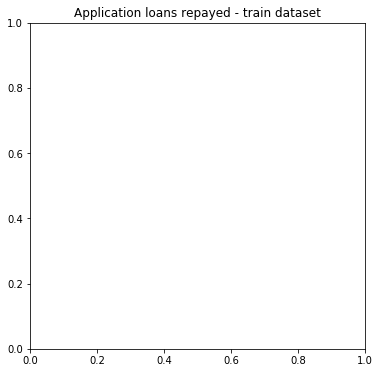

In [92]:
temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

NameError: name 'sns' is not defined

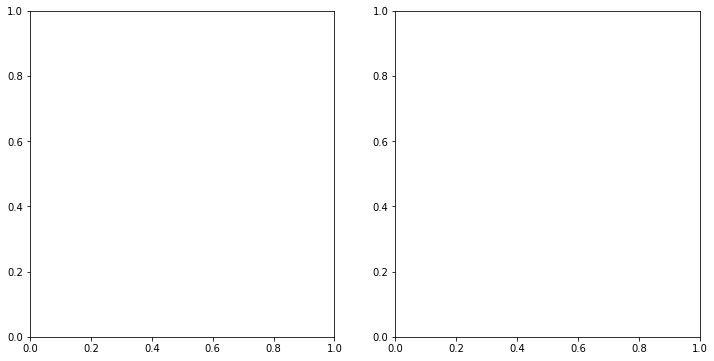

In [93]:
plot_stats('NAME_CONTRACT_TYPE')

NameError: name 'sns' is not defined

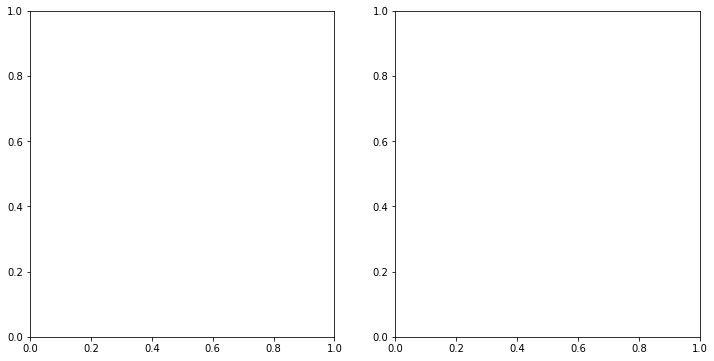

In [94]:
plot_stats('CODE_GENDER')

NameError: name 'sns' is not defined

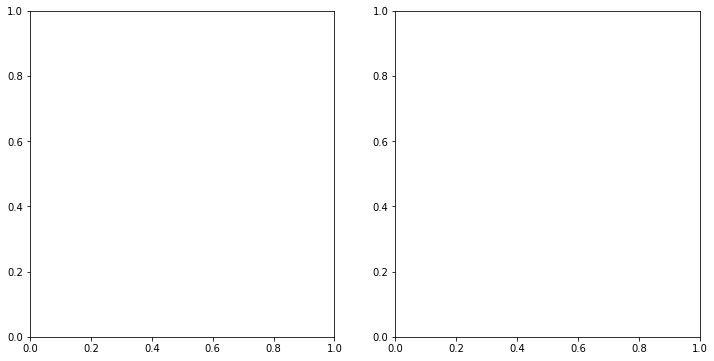

In [95]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

NameError: name 'sns' is not defined

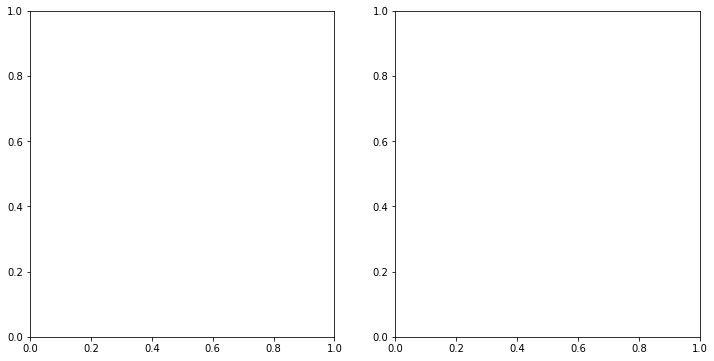

In [96]:
plot_stats('NAME_FAMILY_STATUS',True, True)


NameError: name 'sns' is not defined

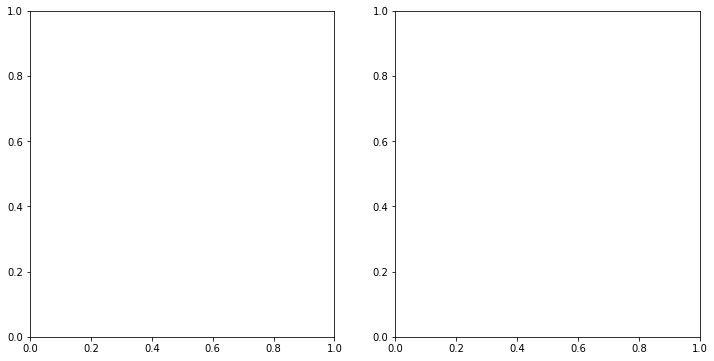

In [97]:
plot_stats('CNT_CHILDREN')

NameError: name 'sns' is not defined

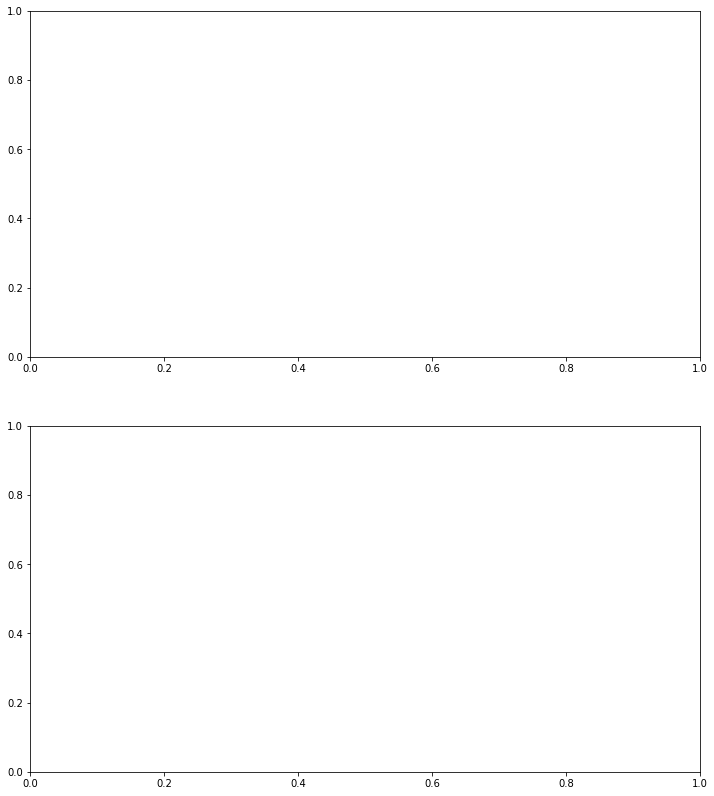

In [98]:
plot_stats('OCCUPATION_TYPE',True, False)


NameError: name 'sns' is not defined

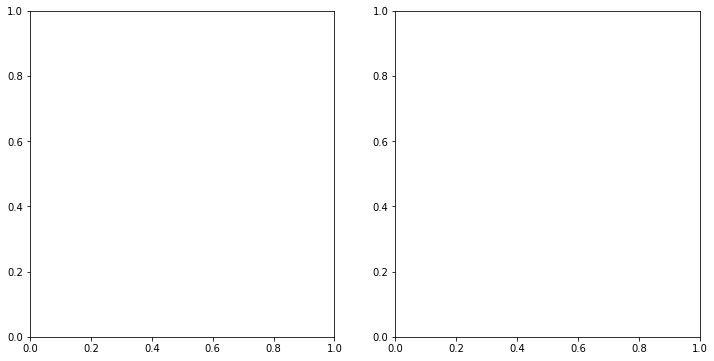

In [99]:
plot_stats('NAME_EDUCATION_TYPE',True)


In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)


NameError: name 'sns' is not defined

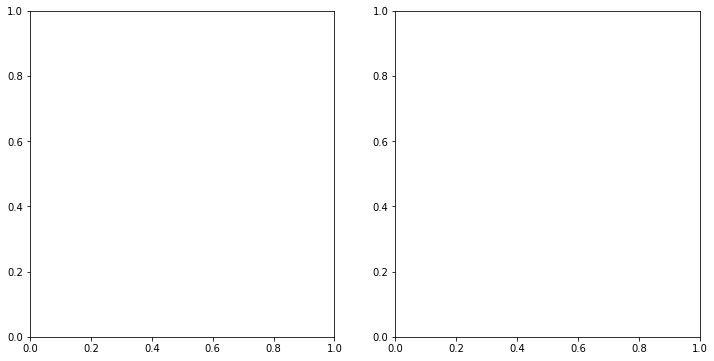

In [100]:
plot_stats('CNT_CHILDREN')

In [101]:
train_target0['ANNU_TO_INCOME'].mode()

NameError: name 'train_target0' is not defined

In [102]:
train_target1['ANNU_TO_INCOME'].median()

NameError: name 'train_target1' is not defined

In [103]:
train_target0['ANNU_TO_INCOME'].median()

NameError: name 'train_target0' is not defined

In [104]:
train_target1['CREDIT_TO_INCOME'] = train_target1['AMT_CREDIT']*100/train_target1['AMT_INCOME_TOTAL']
print('Mean: ', train_target1['CREDIT_TO_INCOME'].mean())
print('Mode: ', train_target1['CREDIT_TO_INCOME'].mode())
print('Median: ', train_target1['CREDIT_TO_INCOME'].median())

NameError: name 'train_target1' is not defined

In [105]:
train_target0['CREDIT_TO_INCOME'] = train_target0['AMT_CREDIT']*100/train_target0['AMT_INCOME_TOTAL']
print('Mean: ', train_target0['CREDIT_TO_INCOME'].mean())
print('Mode: ', train_target0['CREDIT_TO_INCOME'].mode())
print('Median: ', train_target0['CREDIT_TO_INCOME'].median())

NameError: name 'train_target0' is not defined

In [106]:
train_target1['GOOD_TO_INCOME'] = train_target1['AMT_GOODS_PRICE']/train_target1['AMT_INCOME_TOTAL']

NameError: name 'train_target1' is not defined

In [107]:
print('Mean: ', train_target1['GOOD_TO_INCOME'].mean())
print('Mode: ', train_target1['GOOD_TO_INCOME'].mode())
print('Median: ', train_target1['GOOD_TO_INCOME'].median())

NameError: name 'train_target1' is not defined

In [108]:
train_target0['GOOD_TO_INCOME'] = train_target0['AMT_GOODS_PRICE']/train_target0['AMT_INCOME_TOTAL']

NameError: name 'train_target0' is not defined

In [109]:
print('Mean: ', train_target0['GOOD_TO_INCOME'].mean())
print('Mode: ', train_target0['GOOD_TO_INCOME'].mode())
print('Median: ', train_target0['GOOD_TO_INCOME'].median())

NameError: name 'train_target0' is not defined

In [110]:
train_target1['ANNU_TO_INCOME'].sort_values()

NameError: name 'train_target1' is not defined

In [111]:
plt.plot(train_target1['AMT_ANNUITY'].sort_values(),train_target1['AMT_INCOME_TOTAL'], 'r.')
plt.plot(train_target0['AMT_ANNUITY'].sort_values(),train_target0['AMT_INCOME_TOTAL'],'b.');

NameError: name 'train_target1' is not defined

In [112]:
list(set(train_target1['CNT_CHILDREN']))

NameError: name 'train_target1' is not defined

In [113]:
#ax = train_new.plot.bar(rot=0)
train_new_cp = train_new[['TARGET','CNT_CHILDREN','SK_ID_CURR' ]].copy()

#train_new_cp
cnt = train_new_cp.groupby(['TARGET','CNT_CHILDREN' ]).agg(['count'])
cnt
total = train_new['CNT_CHILDREN'].sum()

percentage = cnt*100/total
print(percentage)
#bar= train_new.groupby(['TARGET','CNT_CHILDREN' ]) ['CNT_CHILDREN'].mean()
percentage.plot.bar()

NameError: name 'train_new' is not defined

In [114]:
train_new[['AMT_INCOME_TOTAL','OCCUPATION_TYPE','NAME_INCOME_TYPE','TARGET']].head(50)

NameError: name 'train_new' is not defined

In [115]:
train_new[['AMT_INCOME_TOTAL','OCCUPATION_TYPE','NAME_INCOME_TYPE','TARGET']].loc[train_new['OCCUPATION_TYPE']=='Accountants']

NameError: name 'train_new' is not defined

In [116]:
cash_target1 = train[(train['TARGET']==1)&(train['NAME_CONTRACT_TYPE']=='Cash loans')]
cash_target0 = train[(train['TARGET']==0)&(train['NAME_CONTRACT_TYPE']=='Cash loans')]
rev_target1 = train[(train['TARGET']==1)&(train['NAME_CONTRACT_TYPE']=='Revolving loans')]
rev_target0 = train[(train['TARGET']==0)&(train['NAME_CONTRACT_TYPE']=='Revolving loans')]

In [117]:
cash_target1.shape

(23221, 122)

In [118]:
cash_target0.shape

(255011, 122)

In [119]:
rev_target1.shape

(1604, 122)

In [120]:
rev_target0.shape

(27675, 122)

In [121]:
cash_loan = cash_target1.append(cash_target0.sample(cash_target1.shape[0]), ignore_index=True)

In [122]:
cash_loan.shape

(46442, 122)

In [123]:
cash_loan.to_csv('cash_loan.csv', index=False)

In [124]:
rev_loan = rev_target1.append(rev_target0.sample(rev_target1.shape[0]), ignore_index=True)

In [125]:
rev_loan.to_csv('rev_loan.csv', index=False)

In [126]:
new_train=cash_loan.append(rev_loan, ignore_index=True)

In [127]:
new_train.to_csv('new_train.csv', index =False)

In [128]:
# divide the data into numerical ("quan") and categorical ("qual") features
quan_train = list( train.loc[:,train.dtypes != 'object'].columns.values )
qual_train = list( train.loc[:,train.dtypes == 'object'].columns.values )

In [129]:
len(quan_train)

106

In [130]:
len(qual_train)

16

In [131]:
#pre_app
quan_app = list( pre_app.loc[:,pre_app.dtypes != 'object'].columns.values )
qual_app = list( pre_app.loc[:,pre_app.dtypes == 'object'].columns.values )

NameError: name 'pre_app' is not defined

In [ ]:
#payments
quan_pymt = list( payments.loc[:,payments.dtypes != 'object'].columns.values )
qual_pymt = list( payments.loc[:,payments.dtypes == 'object'].columns.values )

In [218]:
len(quan_train)

NameError: name 'quan_app' is not defined

In [219]:
len(qual_train)

NameError: name 'qual_app' is not defined

In [221]:
missing_data(buba)

NameError: name 'buba' is not defined

In [222]:
missing_data(pos)

NameError: name 'pos' is not defined

In [223]:
missing_data(ccba)

NameError: name 'ccba' is not defined